# Exploratory Analysis of Water Quality Data

This document includes Python code and results of the exploratory analysis of water quality data in the SEACAR Pilot project.

In [1]:
import matplotlib.pyplot as plt
import numpy      as np
import pandas     as pd
import geopandas  as gpd
import contextily as cx

C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\geopandas\_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


## 1. Data preprocessing
Read the csv file of data.

In [2]:
df = pd.read_csv("../OEAT_Discrete-2022-Aug-31.csv")

C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6,17,18,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Select five managed areas and five parameters. Select only columns that are needed for the analysis. Convert the SampleDate from string to datetime object.

In [3]:
df2 = df.loc[df["ManagedAreaName"].isin(["Guana Tolomato Matanzas National Estuarine Research Reserve",
                            "Biscayne Bay Aquatic Preserve",
                            "Estero Bay Aquatic Preserve",
                            "Gasparilla Sound-Charlotte Harbor Aquatic Preserve",
                            "Big Bend Seagrasses Aquatic Preserve"])]
df2 = df2[['RowID','ParameterName','ParameterUnits','ProgramLocationID','ActivityType','ManagedAreaName',
           'SampleDate','Year','Month','ResultValue','ValueQualifier','Latitude_DD','Longitude_DD']]
df2 = df2.loc[df2["ParameterName"].isin(["Salinity","Total Nitrogen","Dissolved Oxygen","Turbidity","Secchi Depth"])]
df2["timestamp"]=  pd.to_datetime(df2['SampleDate'])
df2.head()

RowID     ParameterName ParameterUnits ProgramLocationID ActivityType  \
22     23  Dissolved Oxygen           mg/L        FLW06-0041        Field   
23     24  Dissolved Oxygen           mg/L         FL00-0020        Field   
24     25  Dissolved Oxygen           mg/L         FL00-0011        Field   
25     26  Dissolved Oxygen           mg/L        FLW05-0020        Field   
26     27  Dissolved Oxygen           mg/L         FL01-0014        Field   

                                      ManagedAreaName  SampleDate  Year  \
22  Gasparilla Sound-Charlotte Harbor Aquatic Pres...  2006-12-31  2006   
23  Gasparilla Sound-Charlotte Harbor Aquatic Pres...  2000-12-31  2000   
24               Big Bend Seagrasses Aquatic Preserve  2000-12-31  2000   
25               Big Bend Seagrasses Aquatic Preserve  2005-12-31  2005   
26  Gasparilla Sound-Charlotte Harbor Aquatic Pres...  2001-12-31  2001   

    Month  ResultValue ValueQualifier  Latitude_DD  Longitude_DD  timestamp  
22     12          5.5            NaN     26.83697     -82.09640 2006-12-31  
23     12          5.0            NaN     26.75800     -82.08850 2000-12-31  
24     12          9.6            NaN     29.15600     -83.05780 2000-12-31  
25     12          6.7            NaN     30.07050     -84.10702 2005-12-31  
26     12          5.0            NaN     26.75900     -82.07900 2001-12-31

## 2. Exploratory Analysis
Create lists of water quality parameters, lists of five managed areas and list of statistics to be calculated.

In [4]:
listPara = ["Salinity","Total Nitrogen","Dissolved Oxygen","Turbidity","Secchi Depth"] 
listArea = ["Guana Tolomato Matanzas National Estuarine Research Reserve",
                            "Biscayne Bay Aquatic Preserve",
                            "Estero Bay Aquatic Preserve",
                            "Gasparilla Sound-Charlotte Harbor Aquatic Preserve",
                            "Big Bend Seagrasses Aquatic Preserve" ]
listValue = ["count", "mean","max","min","std"]

Calculate each parameters' Count, Max, Min, Mean, and STD of each areas in weekly, monthly, quarterly and yearly intervals.

In [5]:
weekly_count     = df2.groupby(["ParameterName","ManagedAreaName",pd.Grouper(key="timestamp",freq="W")])[
    "ResultValue"].agg(["count","max","min","mean","std"]).sort_values("timestamp").reset_index()
monthly_count    = df2.groupby(["ParameterName","ManagedAreaName",pd.Grouper(key="timestamp",freq="M")])[
    "ResultValue"].agg(["count","max","min","mean","std"]).sort_values("timestamp").reset_index()
quarterly_count  = df2.groupby(["ParameterName","ManagedAreaName",pd.Grouper(key="timestamp",freq="Q")])[
    "ResultValue"].agg(["count","max","min","mean","std"]).sort_values("timestamp").reset_index()
yearly_count     = df2.groupby(["ParameterName","ManagedAreaName",pd.Grouper(key="timestamp",freq="Y")])[
    "ResultValue"].agg(["count","max","min","mean","std"]).sort_values("timestamp").reset_index()

### 2.1 Weekly Count
Create line charts for sample **counts** in **weekly** intervals. The weekly results show that the number of samples fluctuate from week to week. Some areas have less than 5 data samples in some weeks. Spatial interpolation from the few samples may have high and fluctuating uncertainty. **Thus, spatial interpolation in weekly intervals is NOT practical**. 

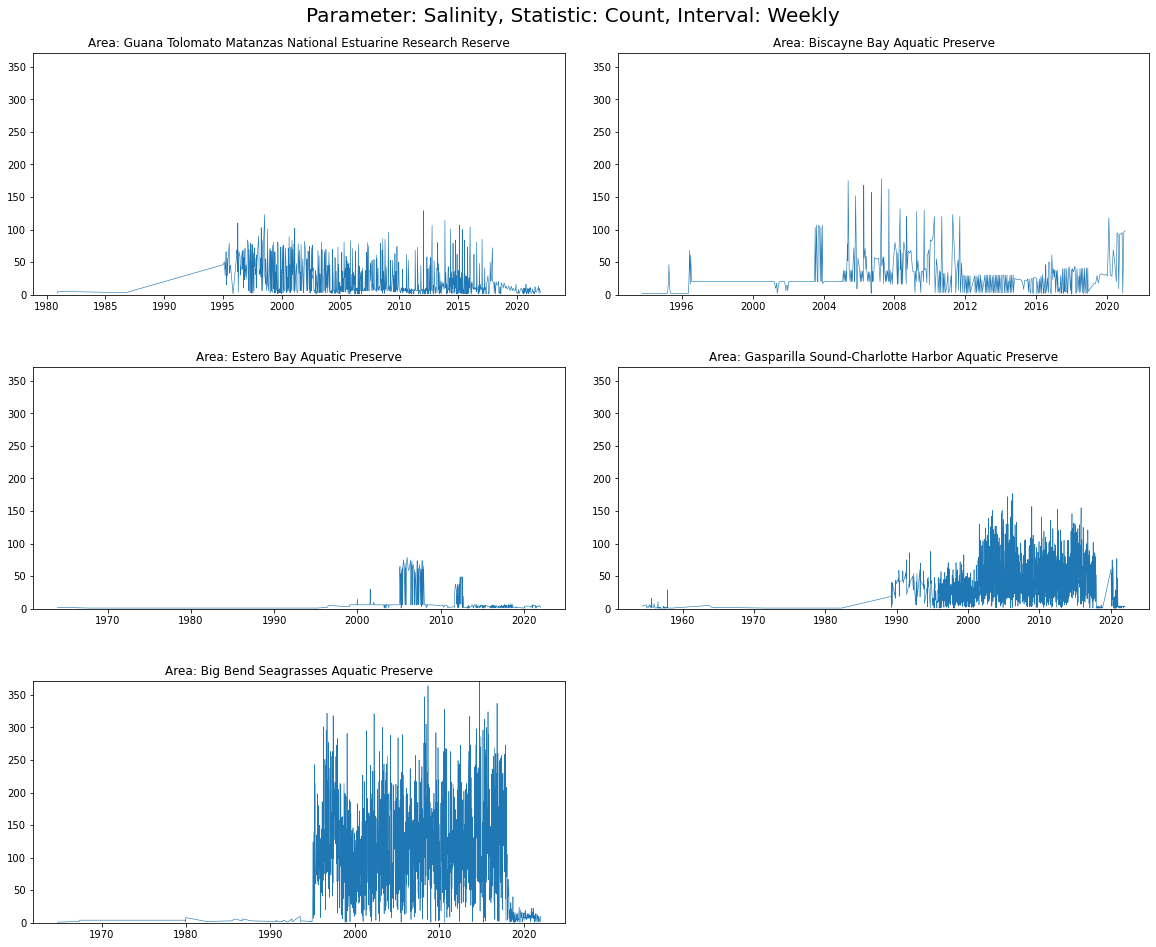

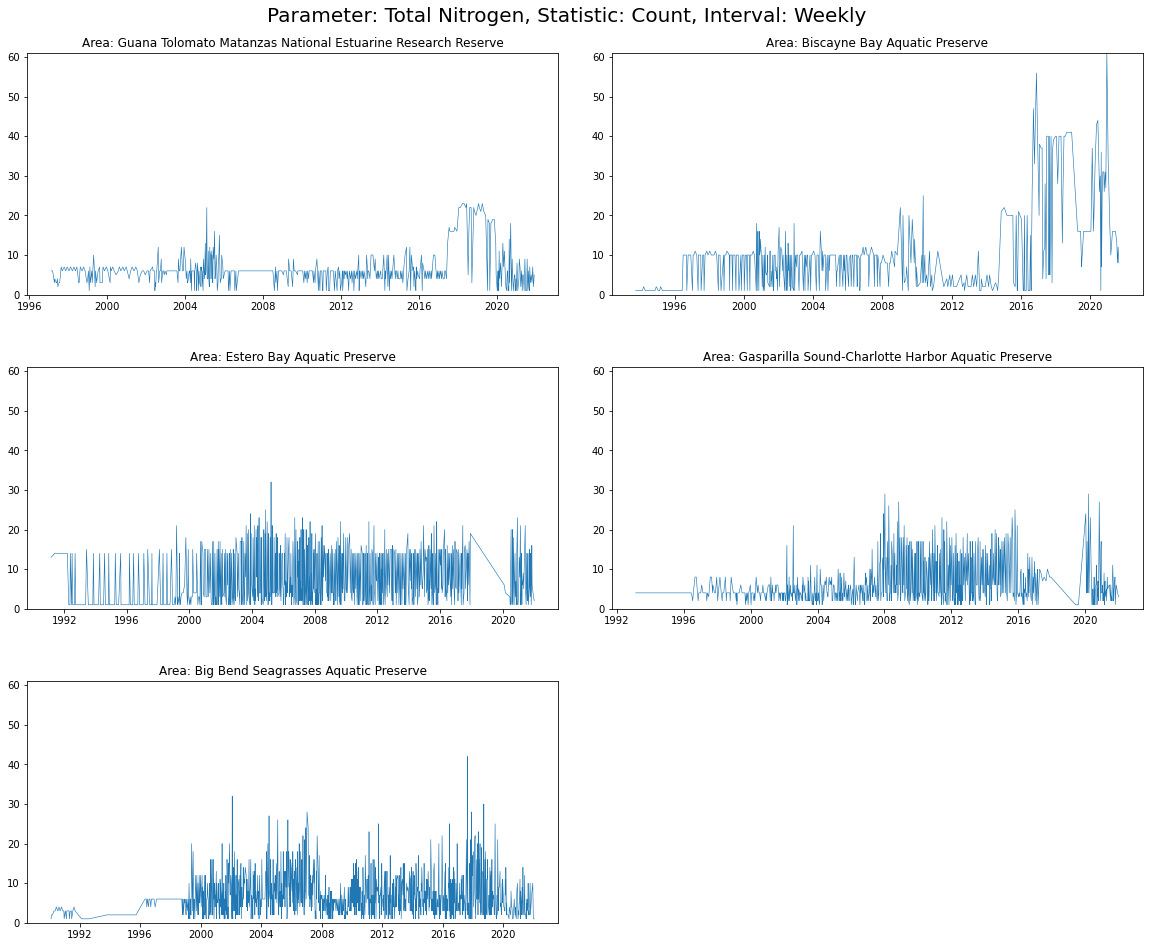

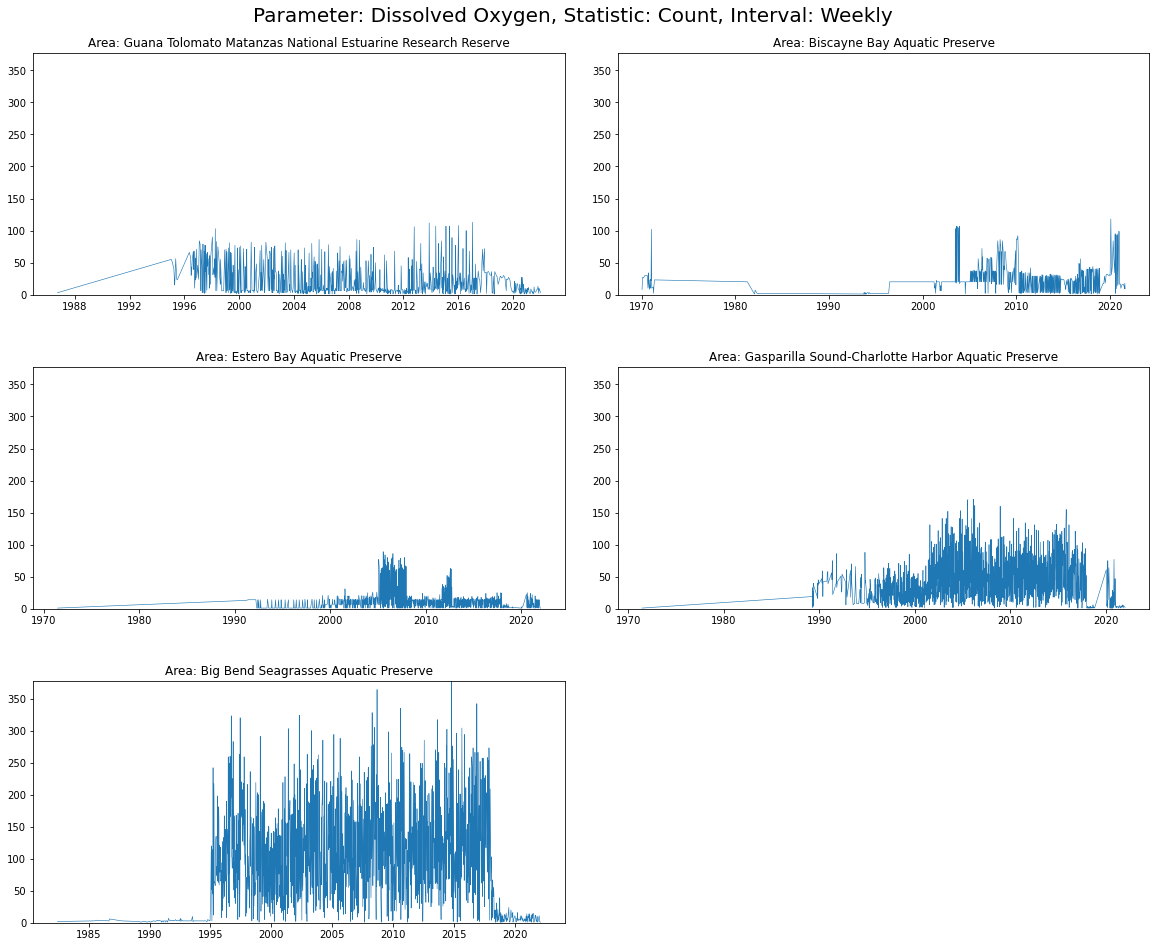

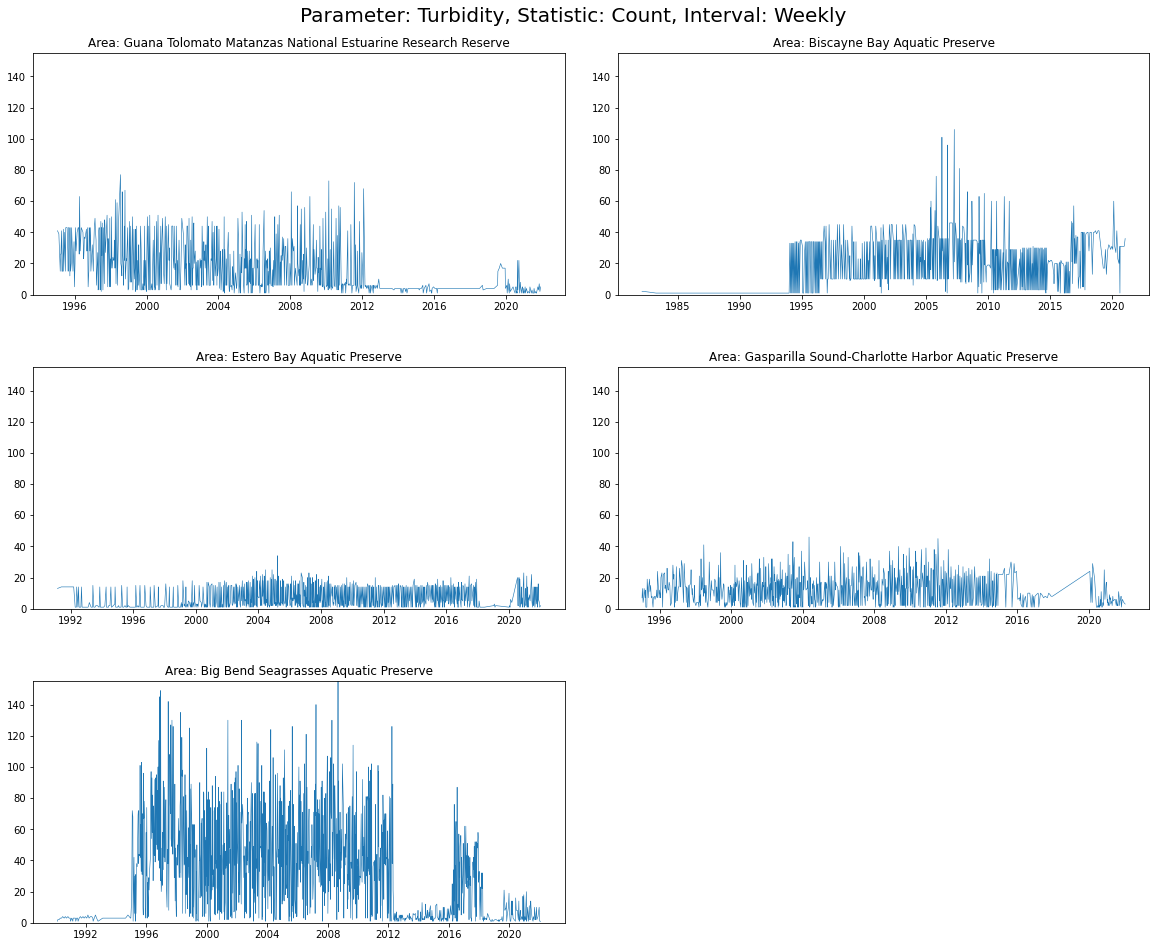

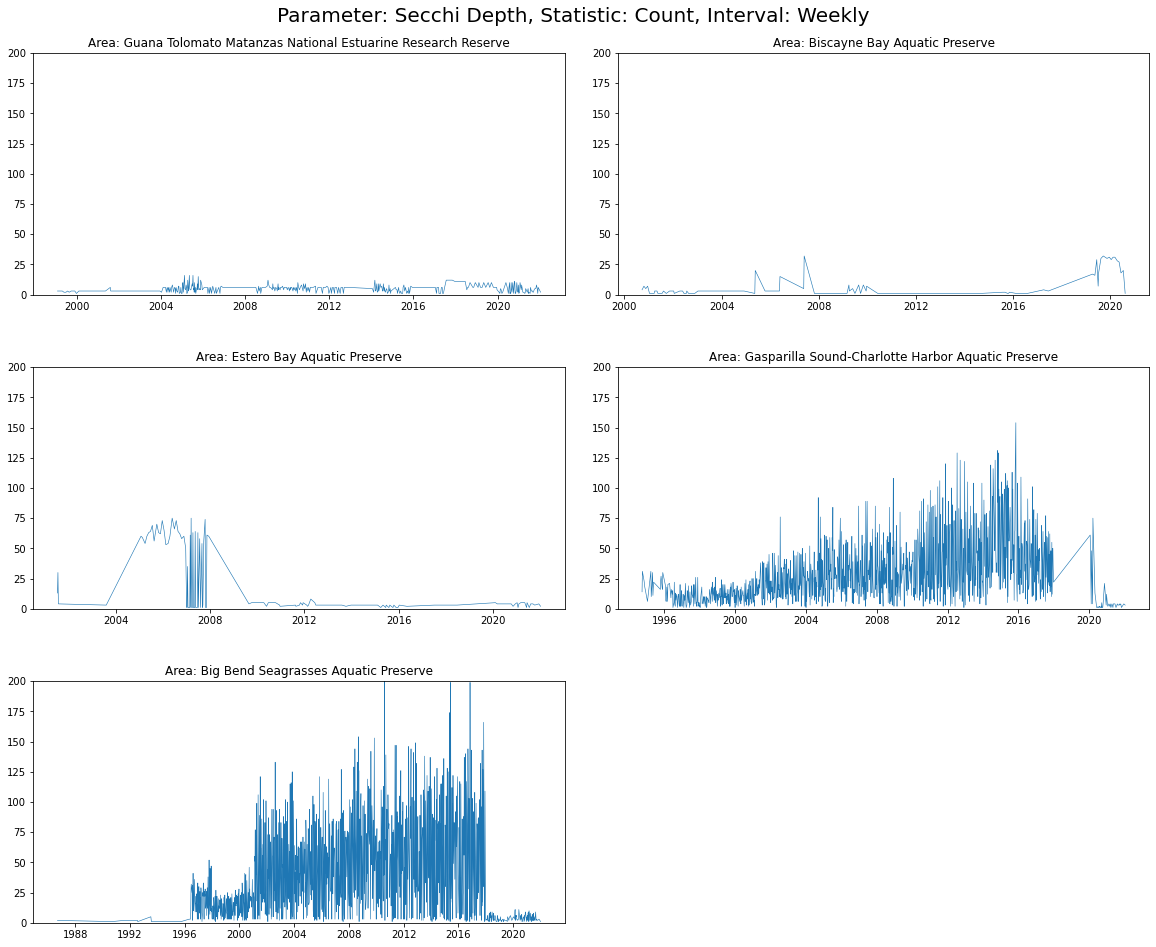

In [6]:
plt.rcParams['figure.figsize'] = [20, 16]
#for value in listValue:
value = listValue[0]
for para in listPara:
    fig = plt.figure()
    # Create the main title
    plt.suptitle("Parameter: " + para + ", Statistic: " + value.capitalize() + ", Interval: Weekly", fontsize = 20, y = 0.92)
    # Calculate the upper limit of y axis
    up_lim = weekly_count[(weekly_count["ParameterName"] == para)]['count'].max()
    for i in range(len(listArea)):
        dfNew = weekly_count[(weekly_count["ParameterName"] == para)&(weekly_count["ManagedAreaName"]== listArea[i])]
        ax = fig.add_subplot(3,2,i+1,title=str('Area: '+ listArea[i]))
        ax.plot(dfNew["timestamp"],dfNew[str(value)],linewidth=0.6)
        ax.set_ylim([0,up_lim])
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)

### 2.2 Monthly Count

Create line charts for sample **counts** in monthly intervals. These line charts shows sampling activity in different time periods.

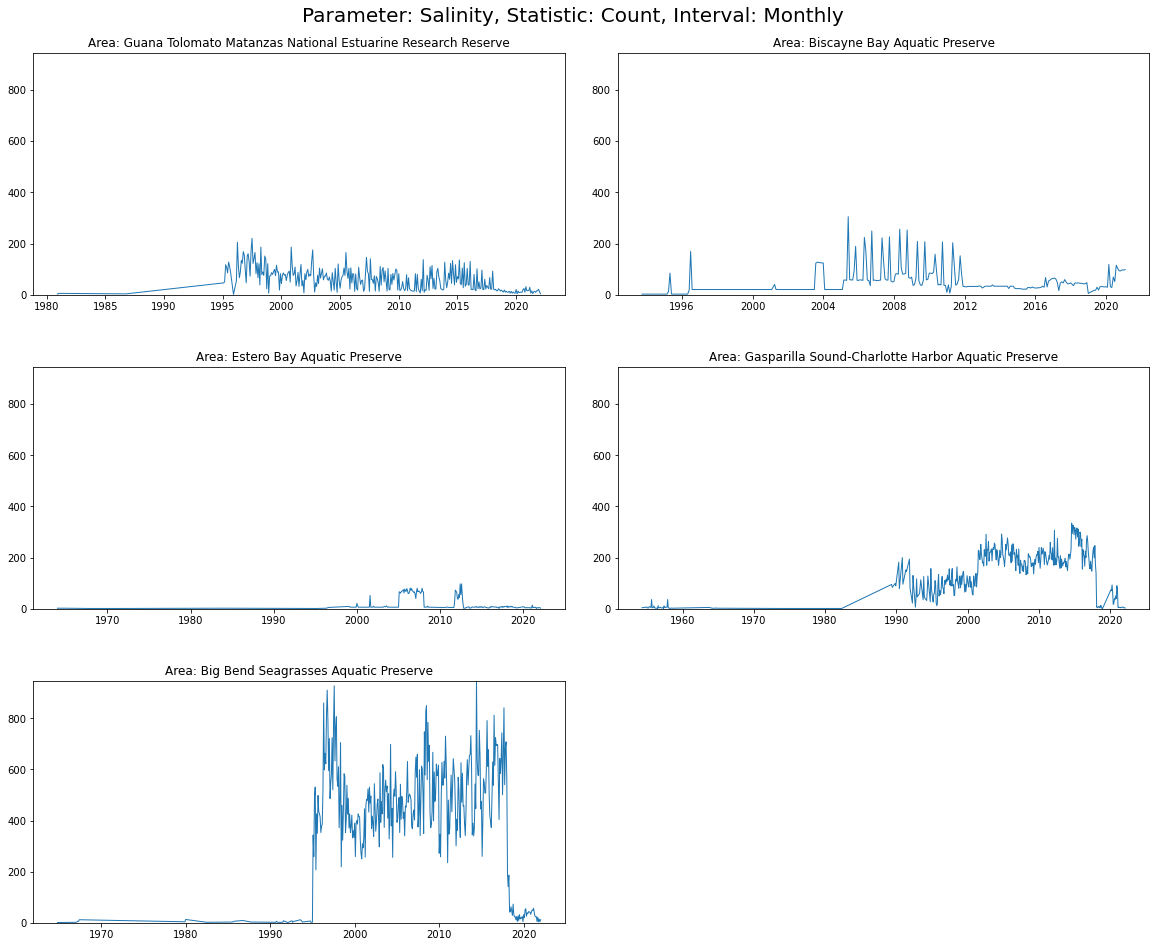

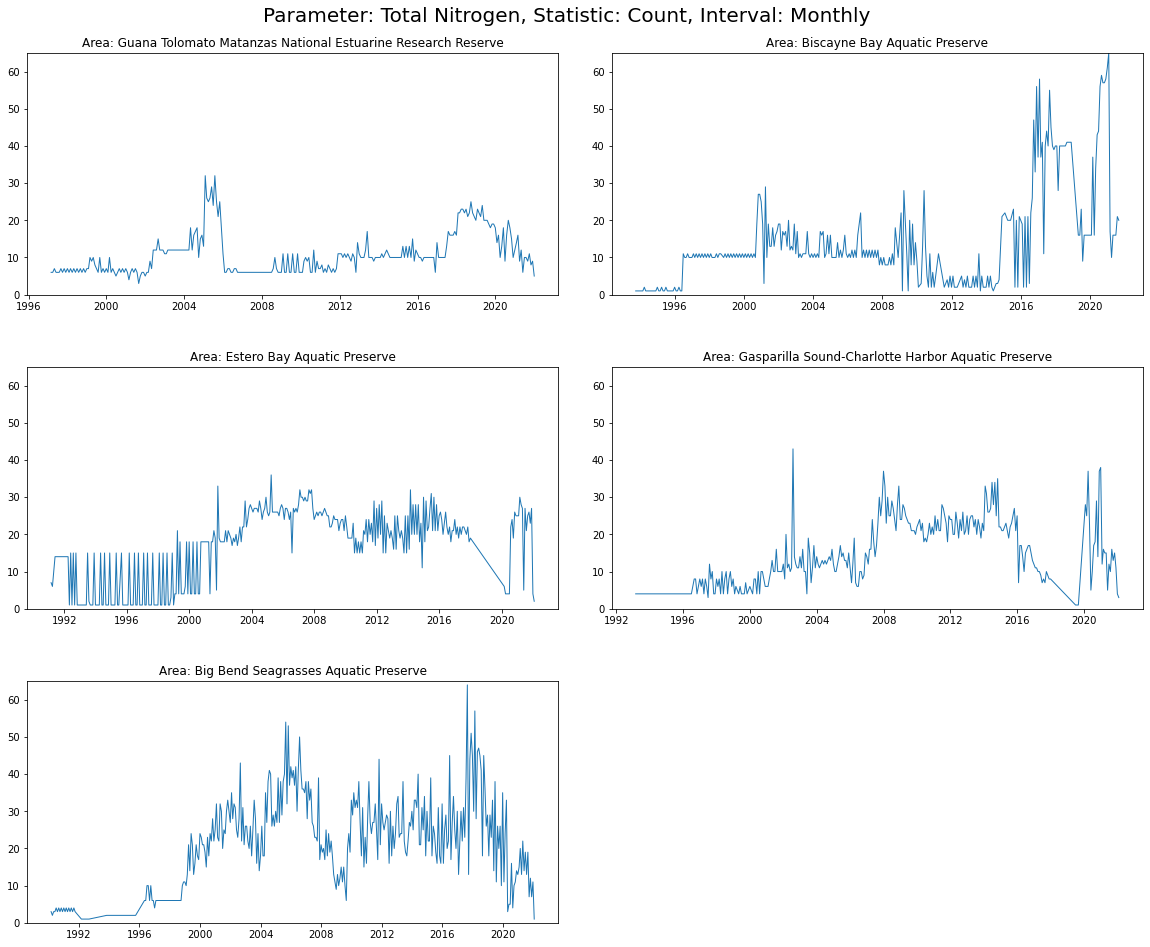

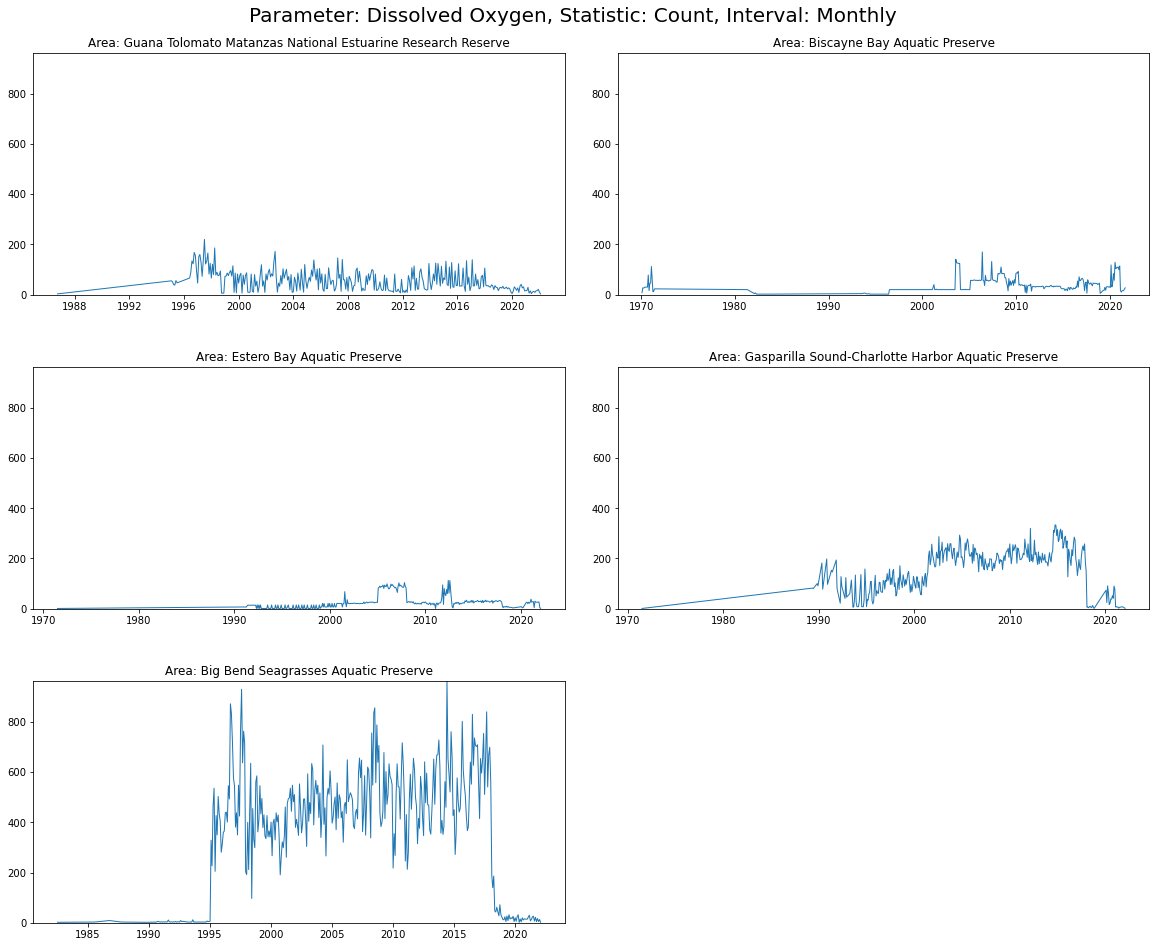

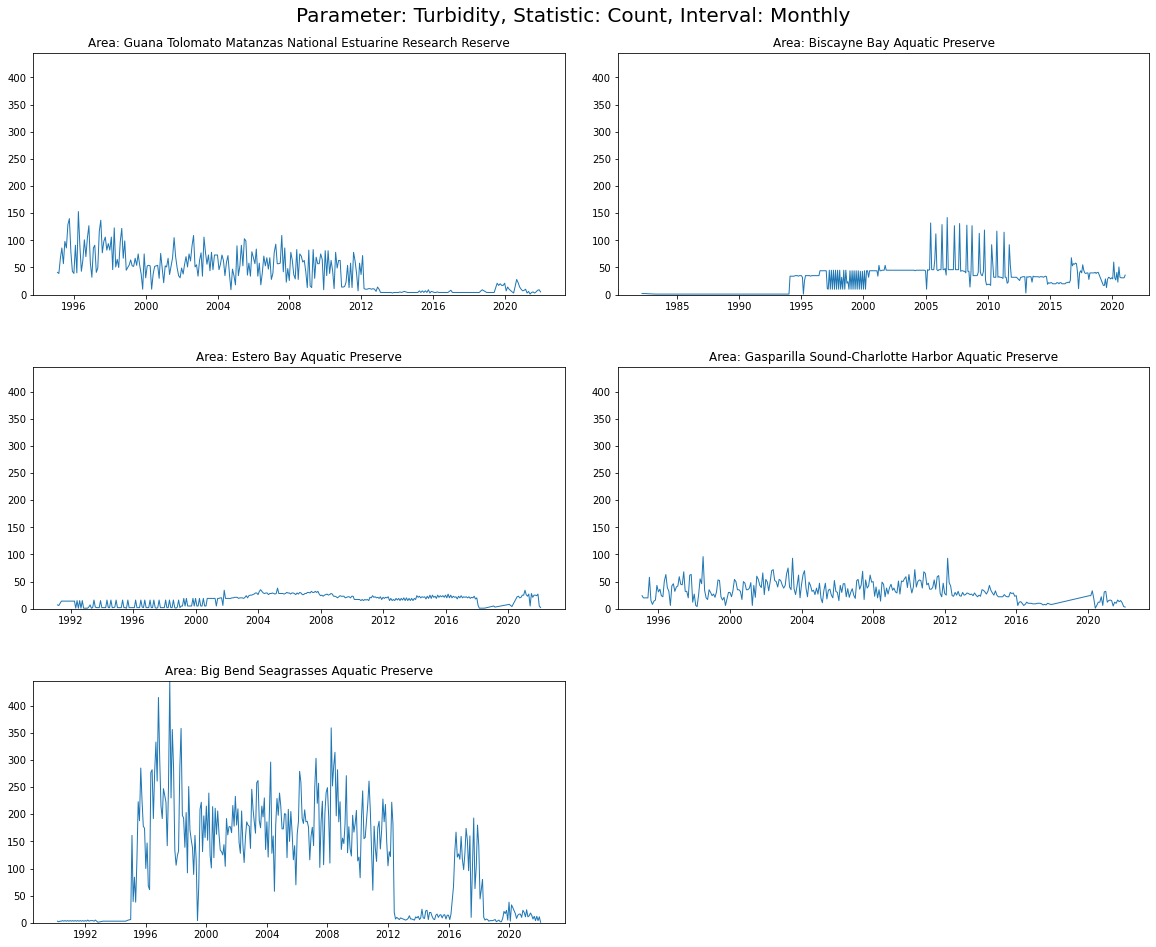

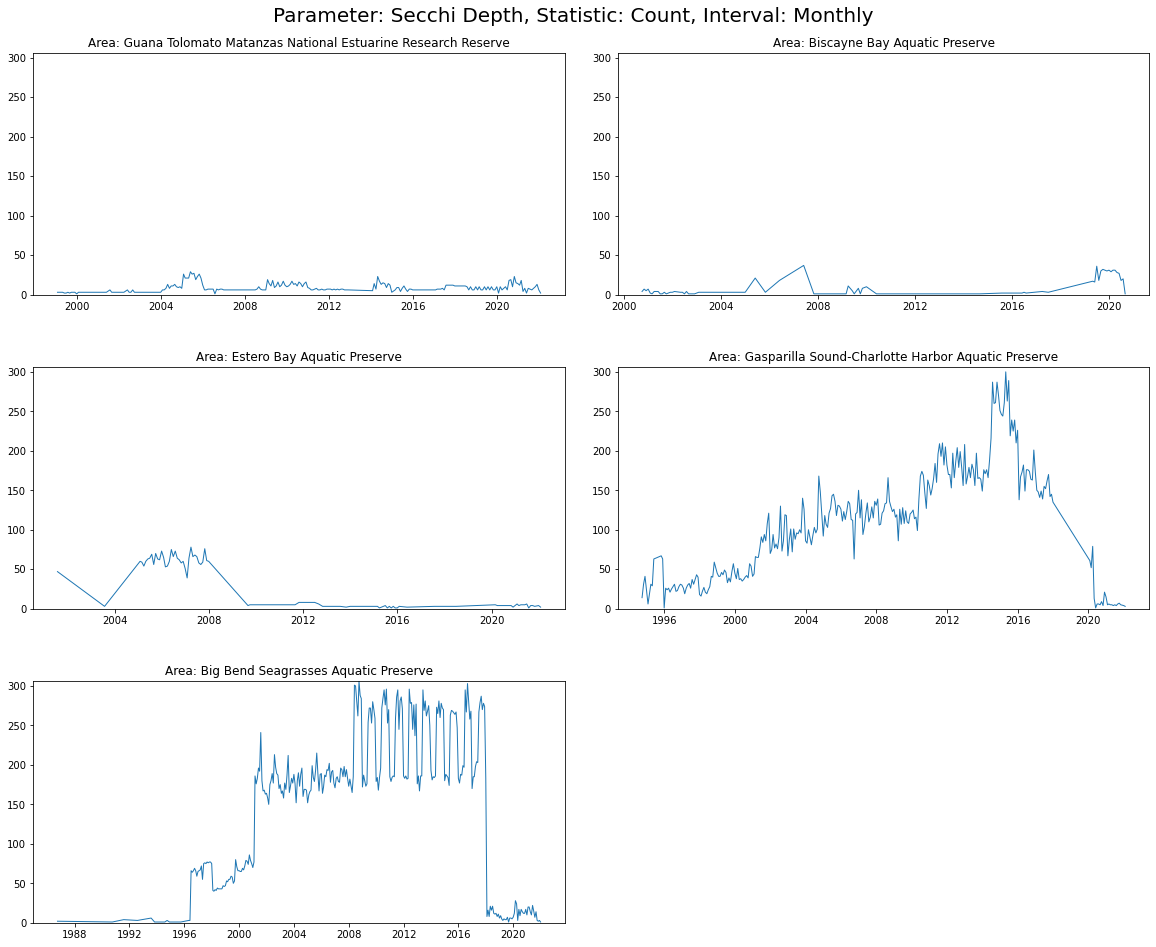

In [11]:
plt.rcParams['figure.figsize'] = [20, 16]
#for value in listValue:
value = listValue[0]
for para in listPara:
    fig = plt.figure()
    # Create the main title
    plt.suptitle("Parameter: " + para + ", Statistic: " + value.capitalize() + ", Interval: Monthly", fontsize = 20, y = 0.92)
    # Calculate the upper limit of y axis
    up_lim = monthly_count[(monthly_count["ParameterName"] == para)]['count'].max()
    for i in range(len(listArea)):
        dfNew = monthly_count[(monthly_count["ParameterName"] == para)&(monthly_count["ManagedAreaName"]== listArea[i])]
        ax = fig.add_subplot(3,2,i+1,title=str('Area: '+ listArea[i]))
        ax.plot(dfNew["timestamp"],dfNew[str(value)],linewidth=1)
        ax.set_ylim([0,up_lim])
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)

### 2.3 Plotting Maximum values in monthly intervals

This is to identify anomalies in the data.

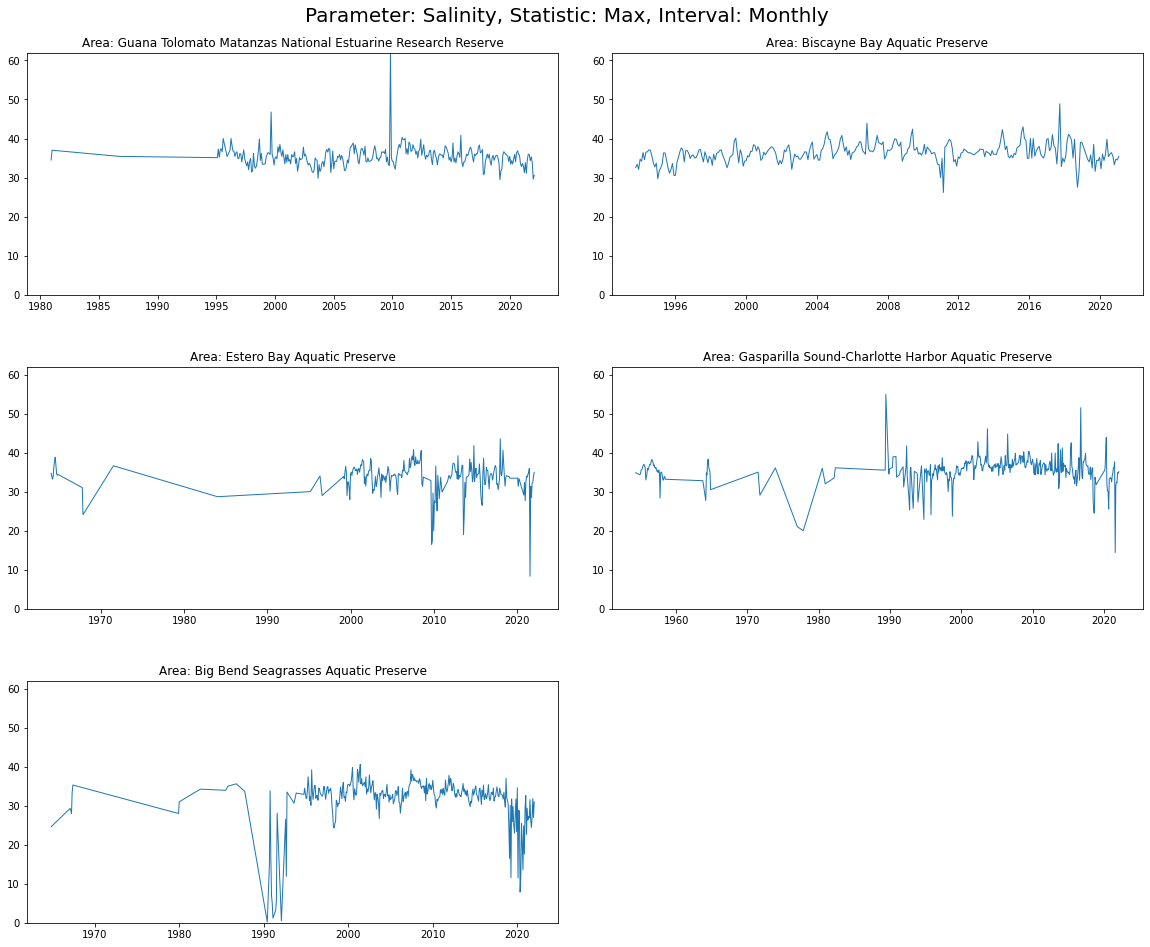

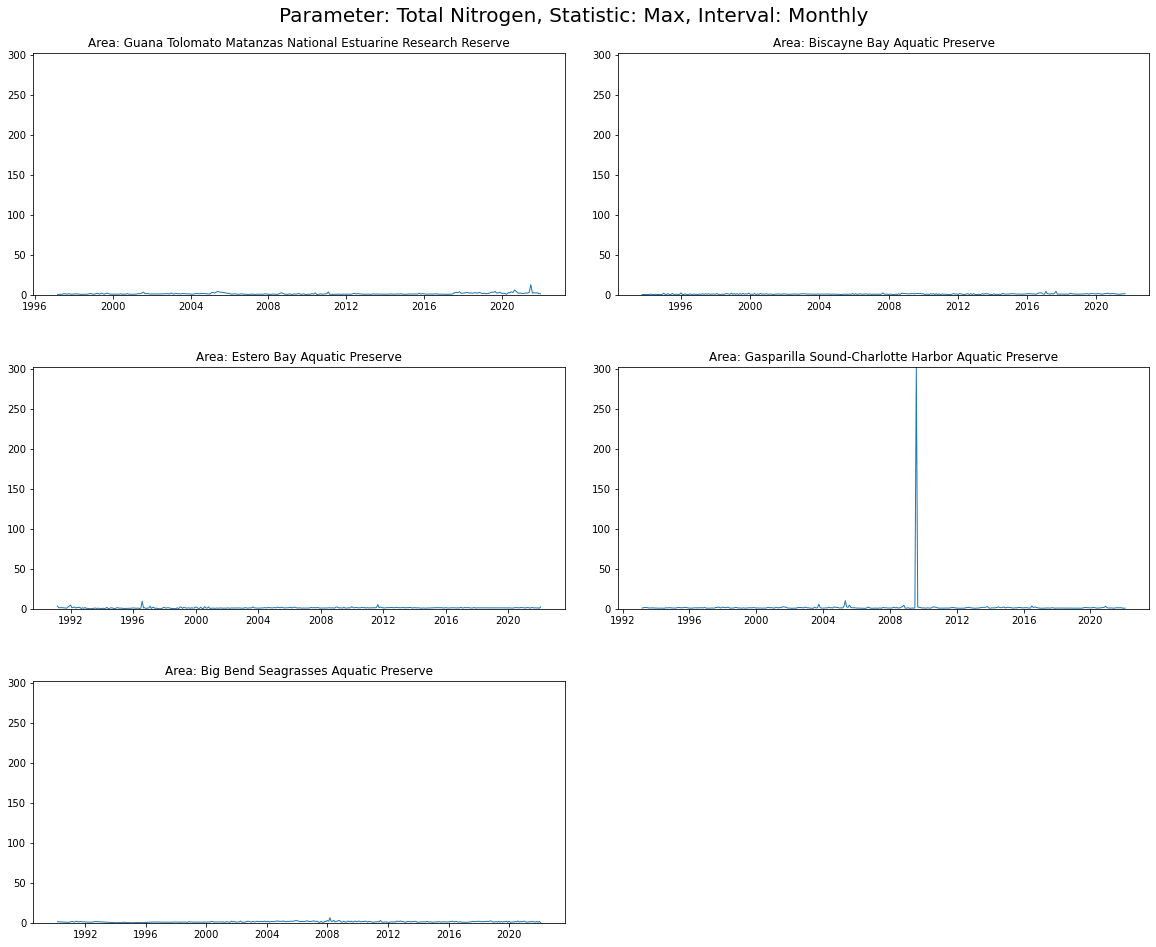

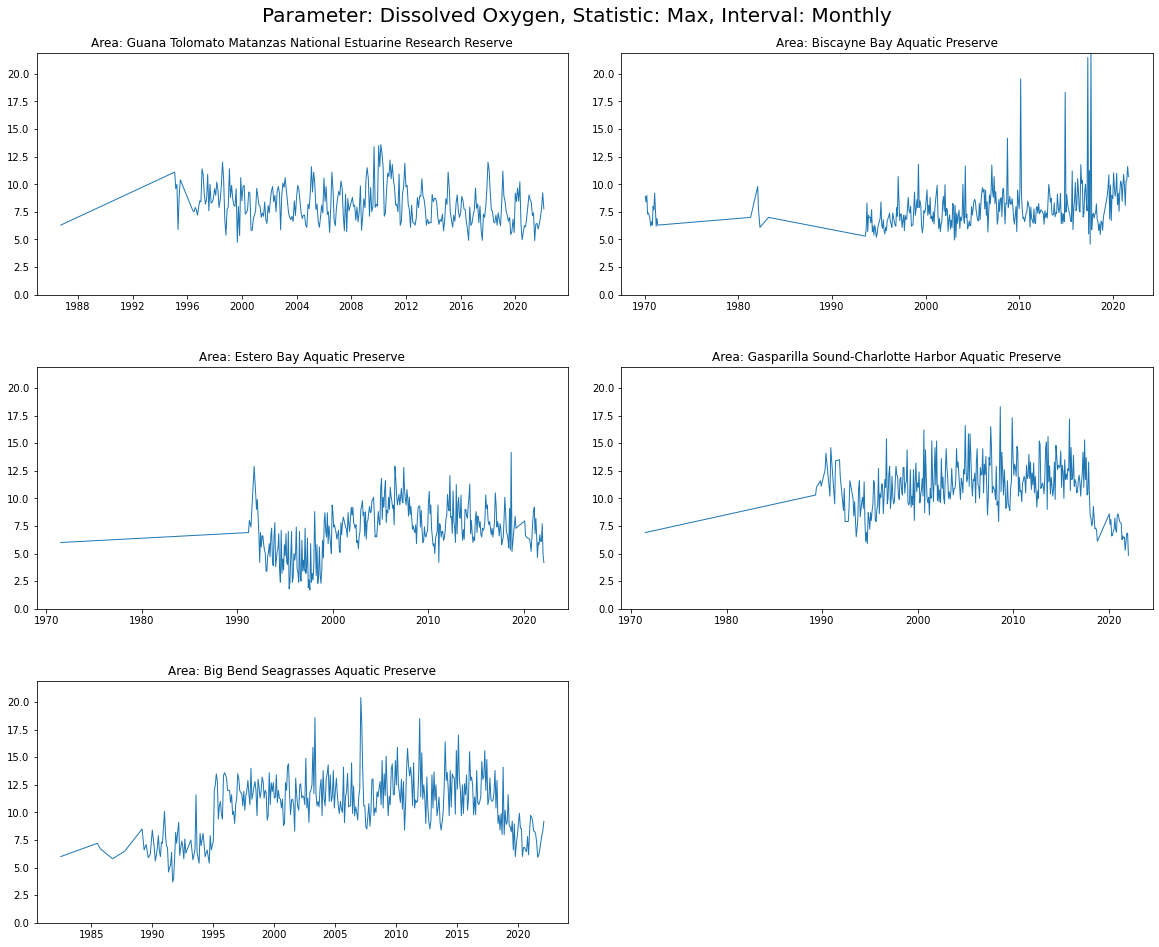

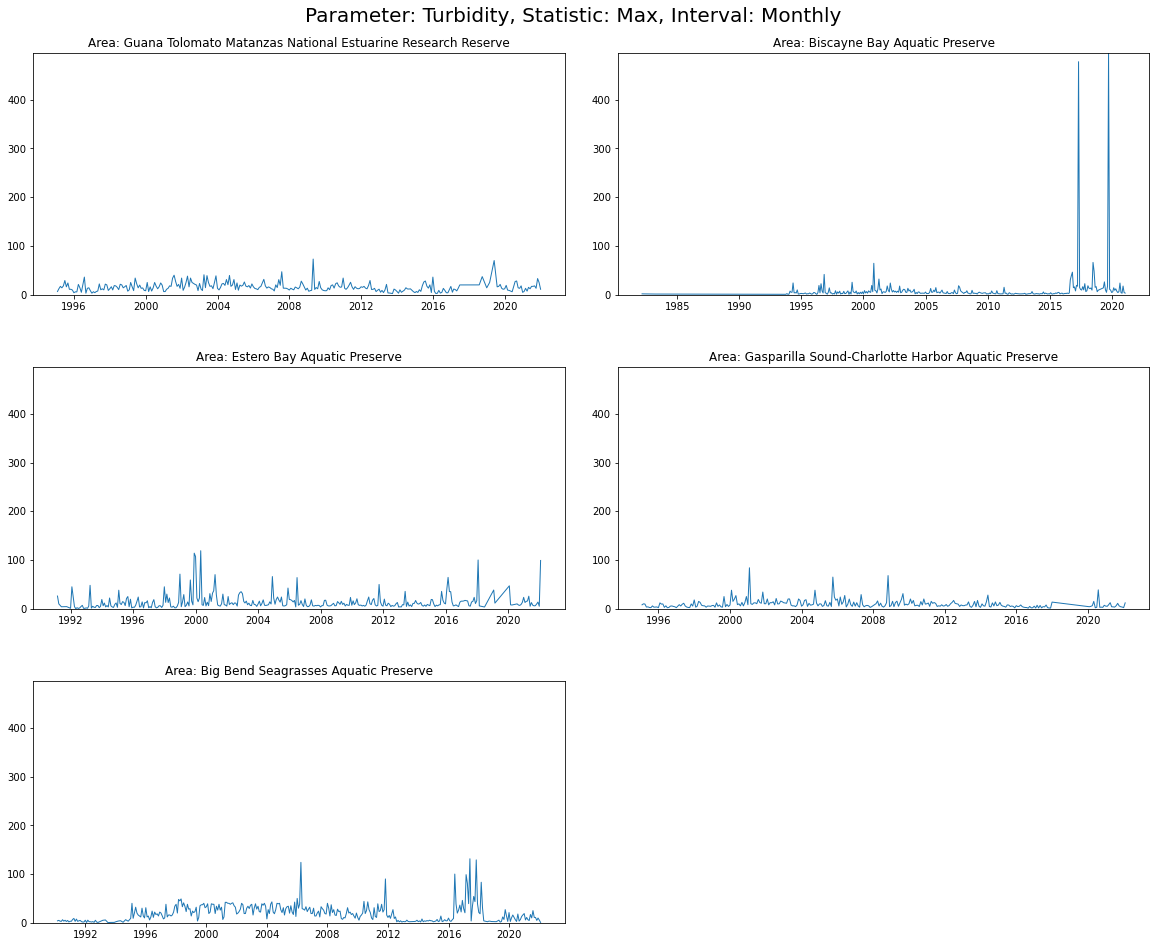

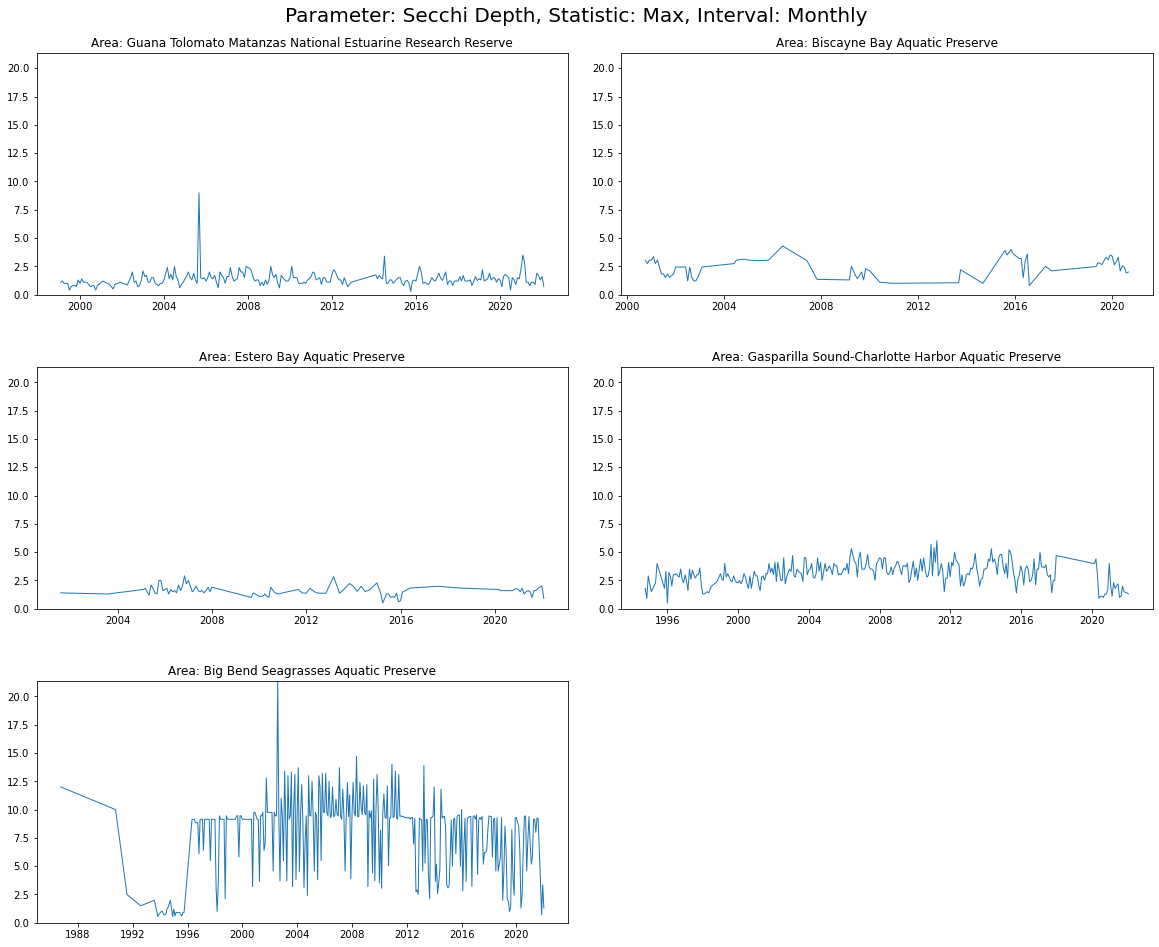

In [12]:
plt.rcParams['figure.figsize'] = [20, 16]
#for value in listValue:
value = 'max'
for para in listPara:
    fig = plt.figure()
    # Create the main title
    plt.suptitle("Parameter: " + para + ", Statistic: " + value.capitalize() + ", Interval: Monthly", fontsize = 20, y = 0.92)
    # Calculate the upper limit of y axis
    up_lim = monthly_count[(monthly_count["ParameterName"] == para)][value].max()
    for i in range(len(listArea)):
        dfNew = monthly_count[(monthly_count["ParameterName"] == para)&(monthly_count["ManagedAreaName"]== listArea[i])]
        ax = fig.add_subplot(3,2,i+1,title=str('Area: '+ listArea[i]))
        ax.plot(dfNew["timestamp"],dfNew[str(value)],linewidth=1)
        ax.set_ylim([0,up_lim])
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)

### 2.3 Monthly Error Bar

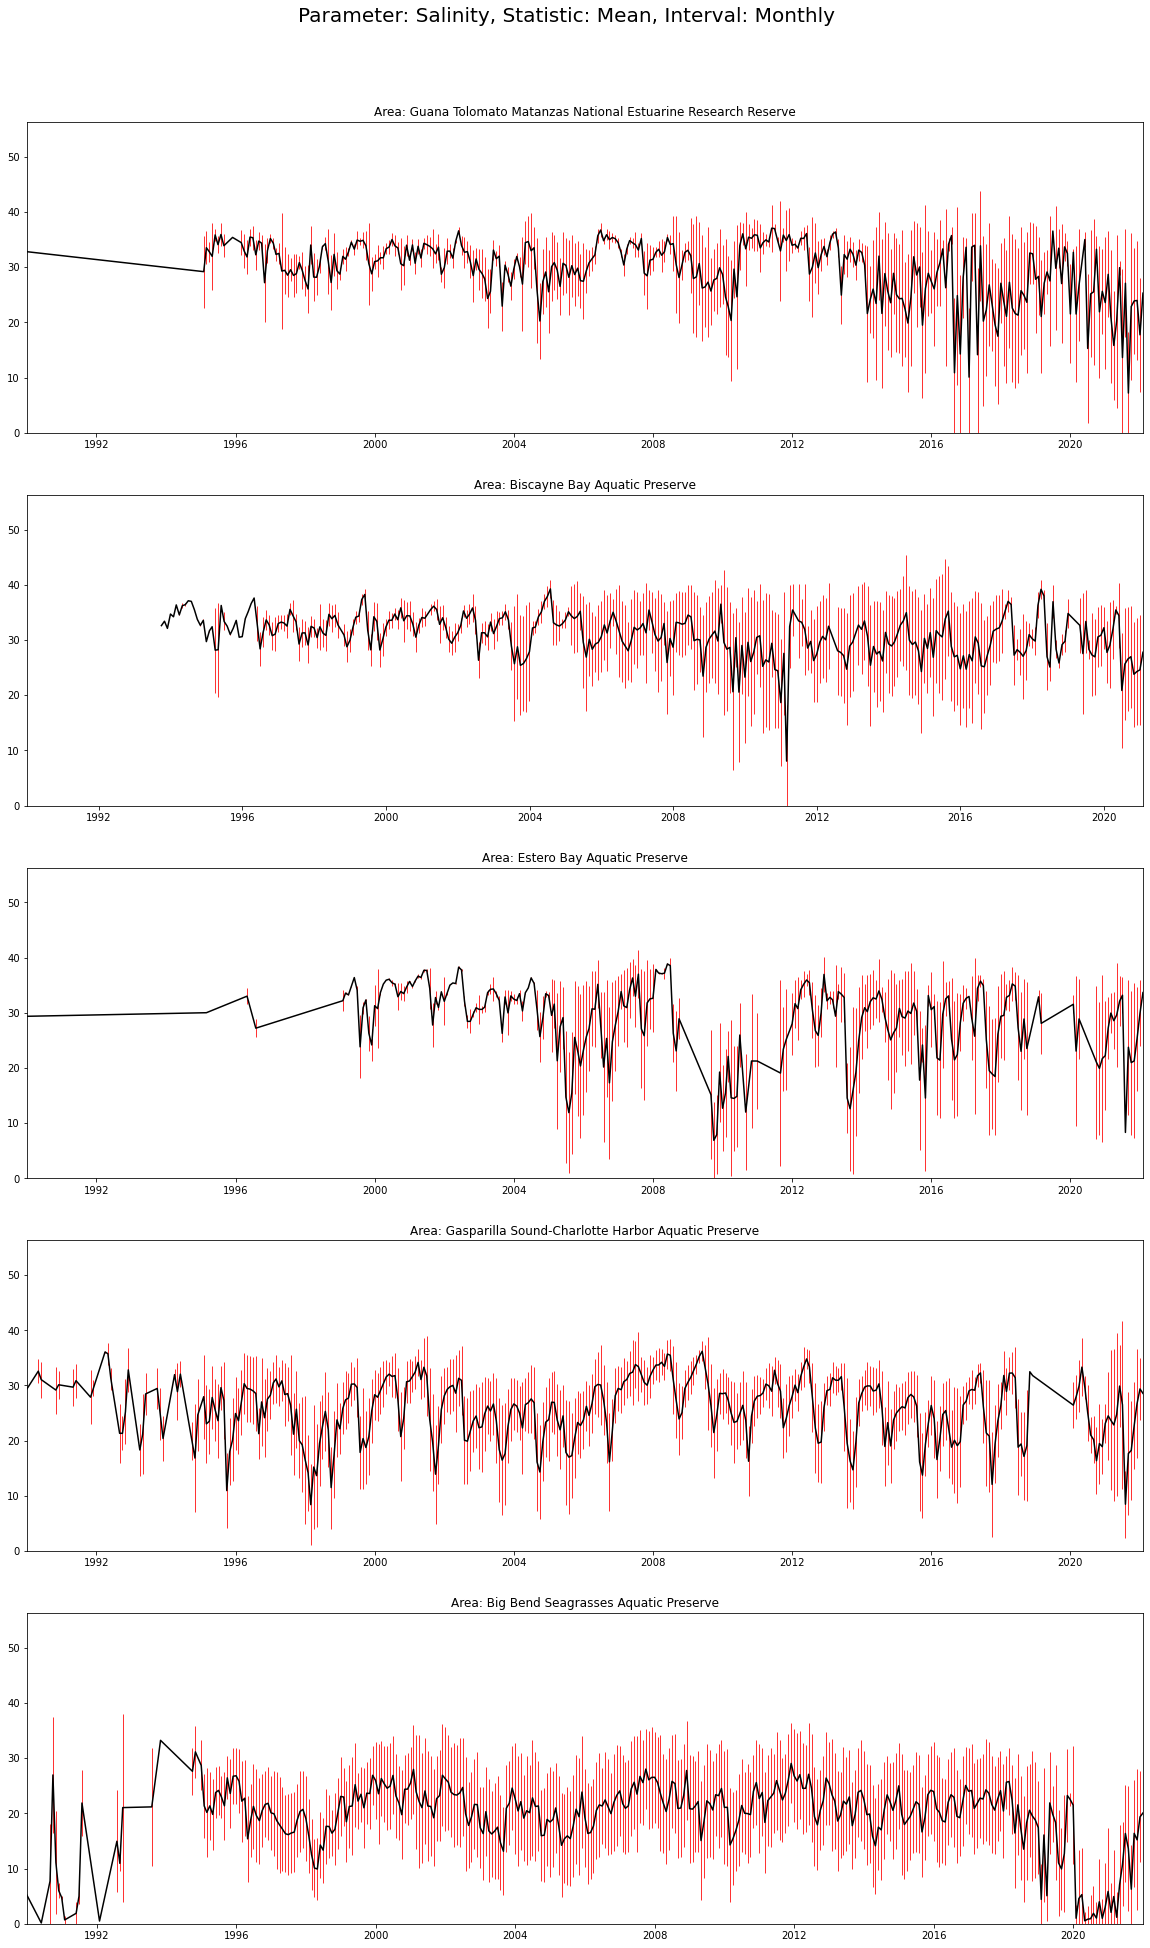

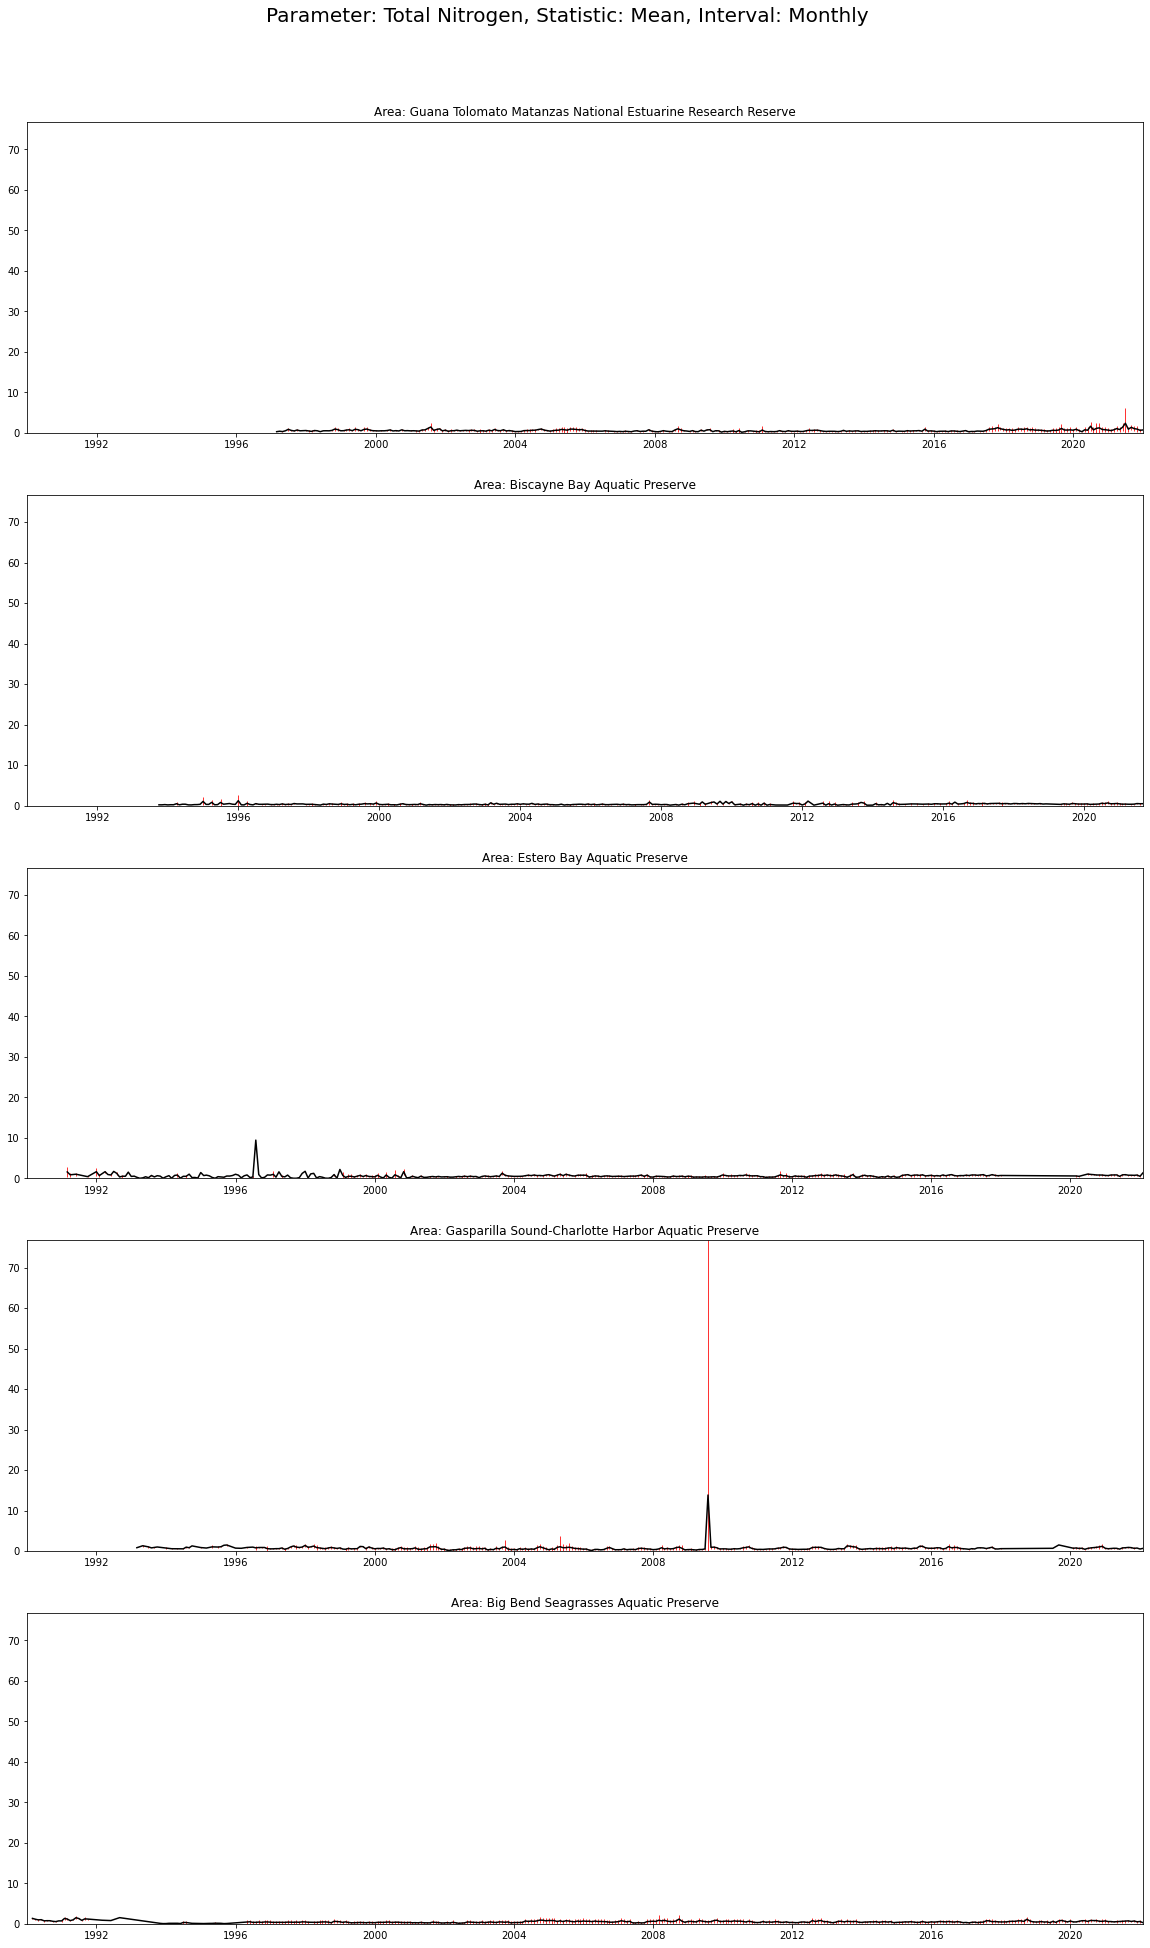

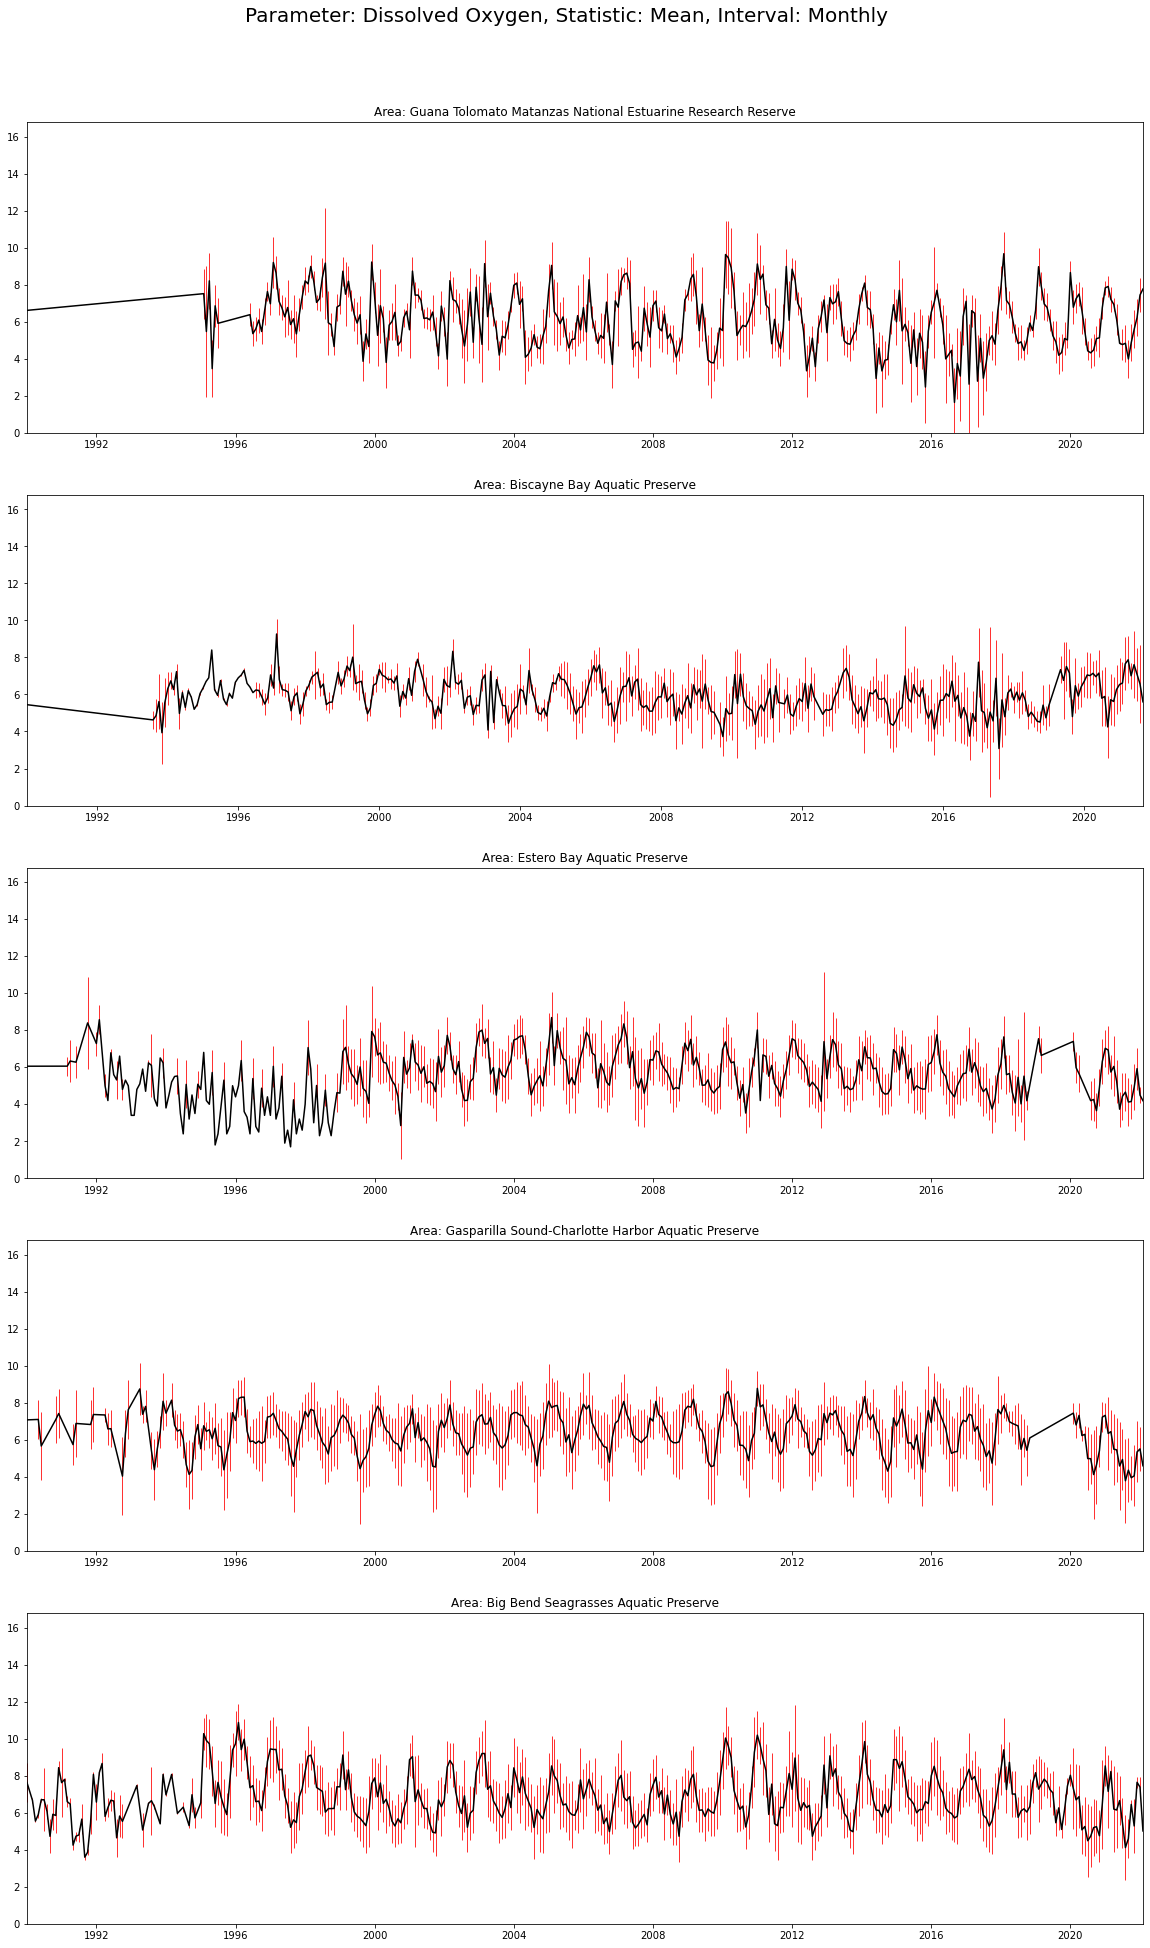

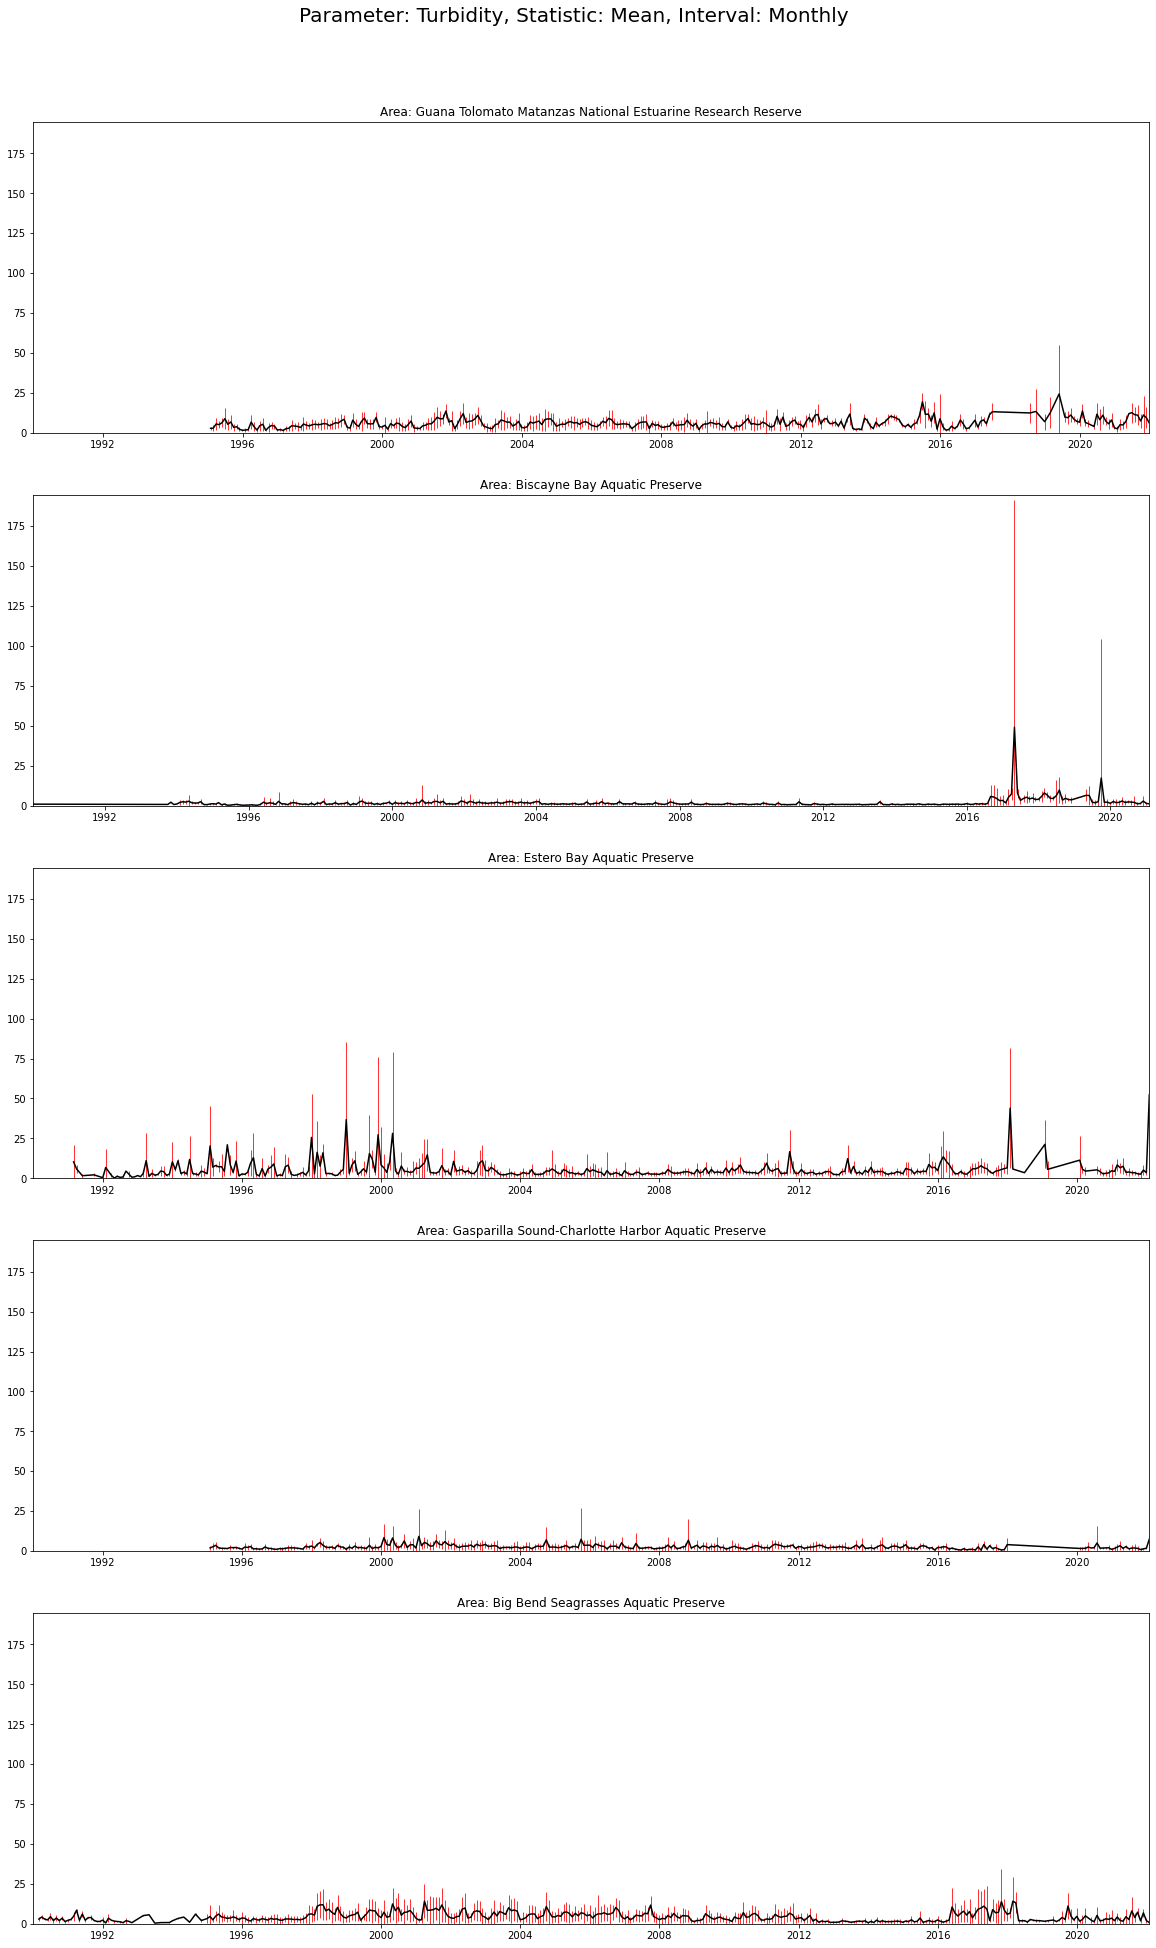

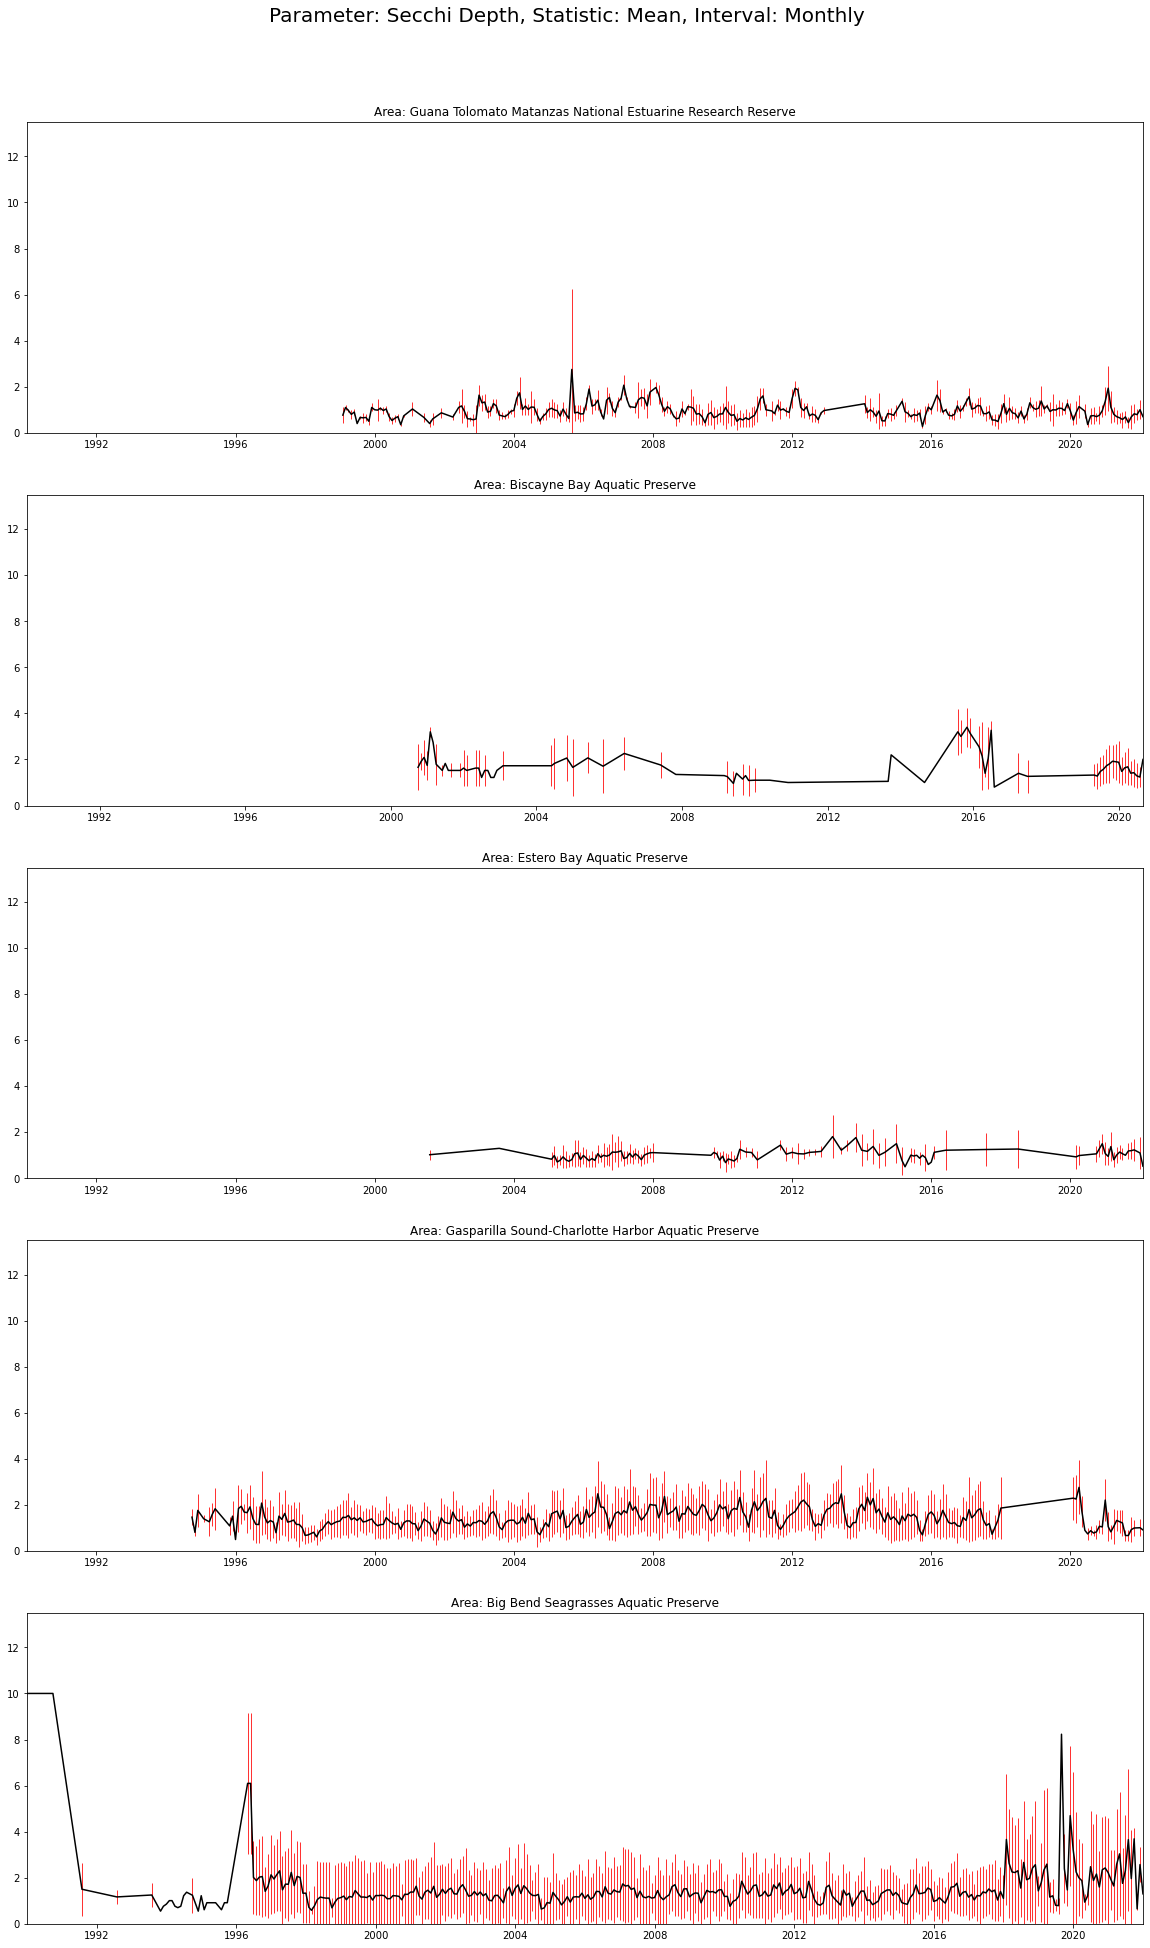

In [13]:
plt.rcParams['figure.figsize'] = [20, 40]
#for value in listValue:
value = listValue[1]
for para in listPara:
    fig = plt.figure()
    # Create the main title
    plt.suptitle("Parameter: " + para + ", Statistic: " + value.capitalize() + ", Interval: Monthly", fontsize = 20, y = 0.92)
    # Calculate the upper limit of y axis
    stats = monthly_count[(monthly_count["ParameterName"] == para)]
    up_lim = stats['mean'].max()+stats['std'].max()
    for i in range(len(listArea)):
        dfNew = monthly_count[(monthly_count["ParameterName"] == para)&(monthly_count["ManagedAreaName"]== listArea[i])]
        ax = fig.add_subplot(6,1,i+1,title=str('Area: '+ listArea[i]))
        #ax.plot(dfNew["timestamp"],dfNew[str(value)],linewidth=0.6)

        ax.errorbar(dfNew["timestamp"],dfNew['mean'],dfNew['std'],ecolor='red',elinewidth = 0.8,color="black")
        # Set limit of x and y axis
        ax.set_ylim([0,up_lim])
        ax.set_xlim([pd.Timestamp('1990-01-01'),dfNew["timestamp"].max()])
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1)

In [ ]:
# Calculate and depict the count, max, min, mean and STD values of each parameters in each managed areas in quarterly period.
plt.rcParams['figure.figsize'] = [15, 10]
for value in listValue:
    for para in listPara:
        fig = plt.figure()
        for i in range(5):
            dfNew = quarterly_count[(quarterly_count["ParameterName"] == para)&
             (quarterly_count["ManagedAreaName"]== listArea[i])]
            ax = fig.add_subplot(3,2,i+1,title=str(listArea[i])+"\n"+"Yearly "+str(para)+" "+str(value).capitalize()+" Value")
            ax.plot(dfNew["timestamp"],dfNew[str(value)])
            plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

In [ ]:
# Calculate and depict the count, max, min, mean and STD values of each parameters in each managed areas in yearly period.
plt.rcParams['figure.figsize'] = [15, 10]
for value in listValue:
    for para in listPara:
        fig = plt.figure()
        for i in range(5):
            dfNew = yearly_count[(yearly_count["ParameterName"] == para)&
             (yearly_count["ManagedAreaName"]== listArea[i])]
            ax = fig.add_subplot(3,2,i+1,title=str(listArea[i])+"\n"+"Yearly "+str(para)+" "+str(value).capitalize()+" Value")
            ax.plot(dfNew["timestamp"],dfNew[str(value)])
            plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

## Plot sample locations

This step is to calculate the sample location of Salinity in five areas and to calculate whether they are mixed points or random points.

In [116]:

# Group data by latitude and longitude and calculate their frequency in each location
dfLoc  = df2[df2["ParameterName"]=="Salinity"].groupby(['Latitude_DD','Longitude_DD',"ManagedAreaName"])["ResultValue"].agg("count").reset_index()
# Define the location which is only sampled by once as random location.
dfRand = dfLoc[dfLoc["ResultValue"] == 1]
# Define the location which is sampled over once as mixed location.
dfMixd = dfLoc[dfLoc["ResultValue"] >  1]
# Replace the frequency to the name of mixed point or random point.
dfLoc.loc[dfLoc["ResultValue"]>1,"ResultValue"]="Mixed Point"
dfLoc.loc[dfLoc["ResultValue"]==1,"ResultValue"]="Random Point"
# Transform the DataFrame into GeoDataFrame
gdf_Salinity = gpd.GeoDataFrame(dfLoc, 
                                geometry = gpd.points_from_xy(dfLoc.Longitude_DD, dfLoc.Latitude_DD),
                                crs="EPSG:4326")
gdf_Salinity.head()

Latitude_DD  Longitude_DD                ManagedAreaName   ResultValue  \
0     25.29060     -80.36980  Biscayne Bay Aquatic Preserve   Mixed Point   
1     25.29630     -80.32550  Biscayne Bay Aquatic Preserve   Mixed Point   
2     25.30040     -80.33100  Biscayne Bay Aquatic Preserve   Mixed Point   
3     25.30095     -80.30855  Biscayne Bay Aquatic Preserve   Mixed Point   
4     25.30189     -80.30617  Biscayne Bay Aquatic Preserve  Random Point   

                     geometry  
0  POINT (-80.36980 25.29060)  
1  POINT (-80.32550 25.29630)  
2  POINT (-80.33100 25.30040)  
3  POINT (-80.30855 25.30095)  
4  POINT (-80.30617 25.30189)

In [117]:
# This step is to calculate the ratios of random points to total points in five areas.
ls_ratio = []

for area in listArea:
    selectArea = gdf_Salinity[gdf_Salinity["ManagedAreaName"]==area]
    allPoints  = selectArea["ResultValue"].count()
    randPoints = selectArea.loc[selectArea["ResultValue"]=="Random Point"]["ResultValue"].count()
    ratio      = round(randPoints/allPoints,4)
    ls_ratio = append(ratio)
    print(str(area)+"'s ratio of the random points in Salinity is "+str(ratio))

Guana Tolomato Matanzas National Estuarine Research Reserve's ratio of the random points in Salinity is 0.4294
Biscayne Bay Aquatic Preserve's ratio of the random points in Salinity is 0.1563
Estero Bay Aquatic Preserve's ratio of the random points in Salinity is 0.1484
Gasparilla Sound-Charlotte Harbor Aquatic Preserve's ratio of the random points in Salinity is 0.1858
Big Bend Seagrasses Aquatic Preserve's ratio of the random points in Salinity is 0.2086


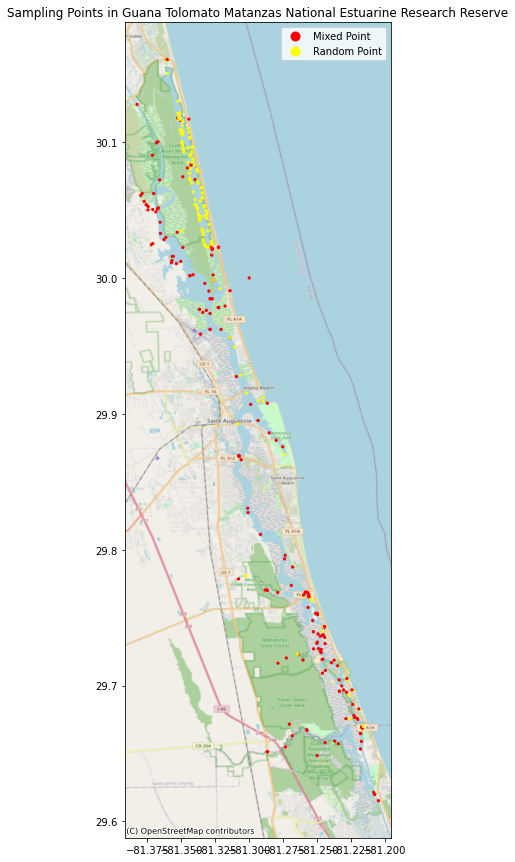

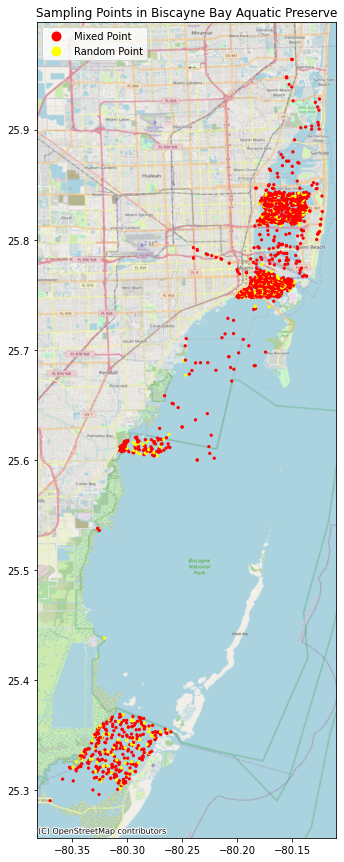

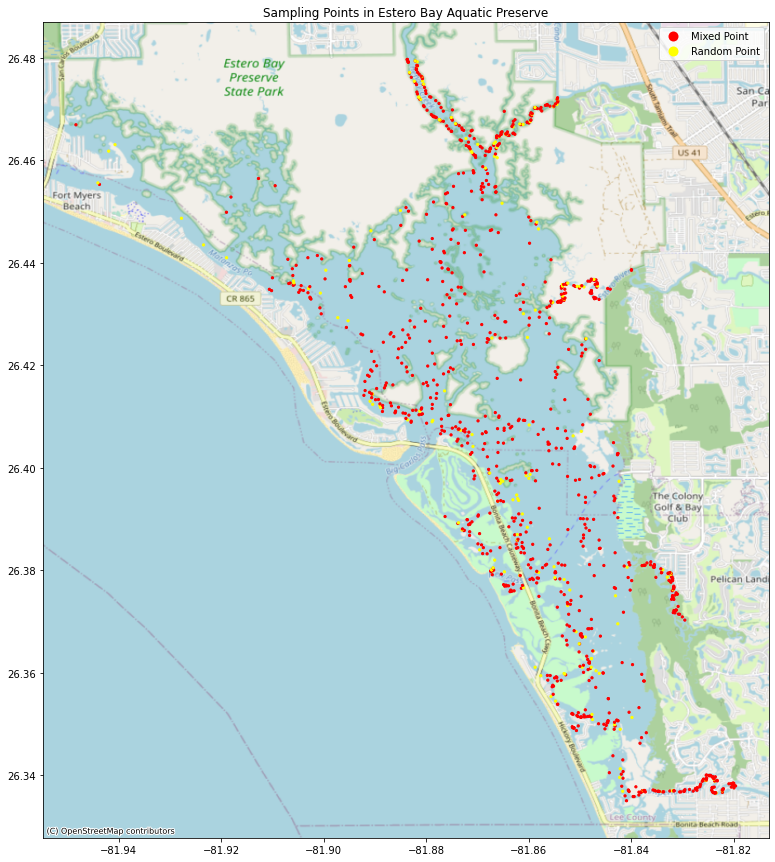

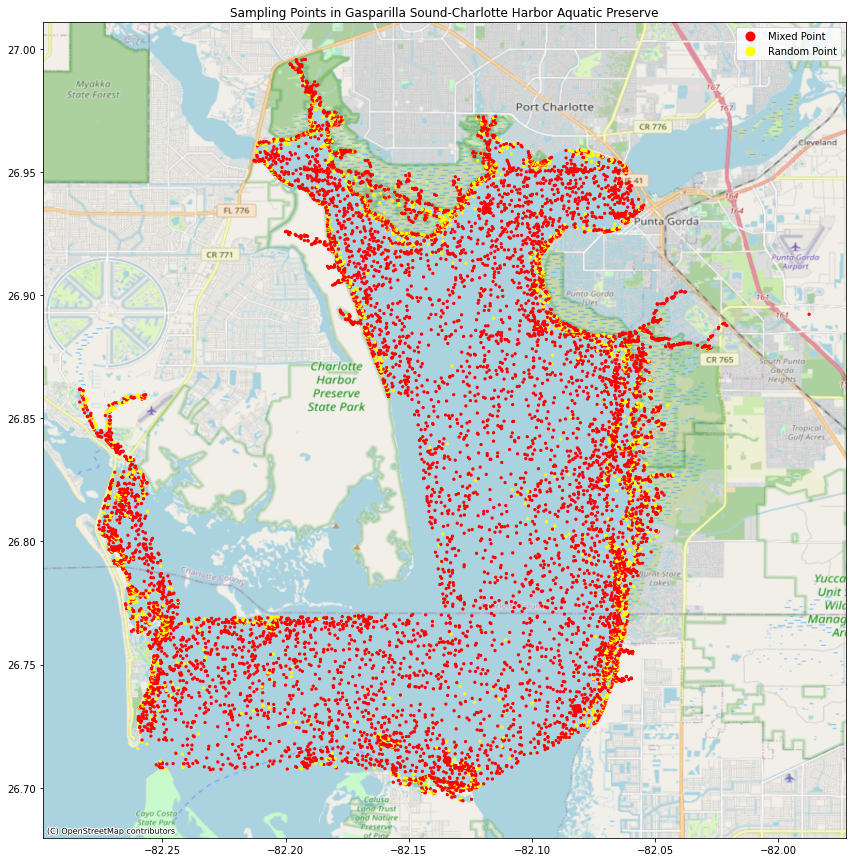

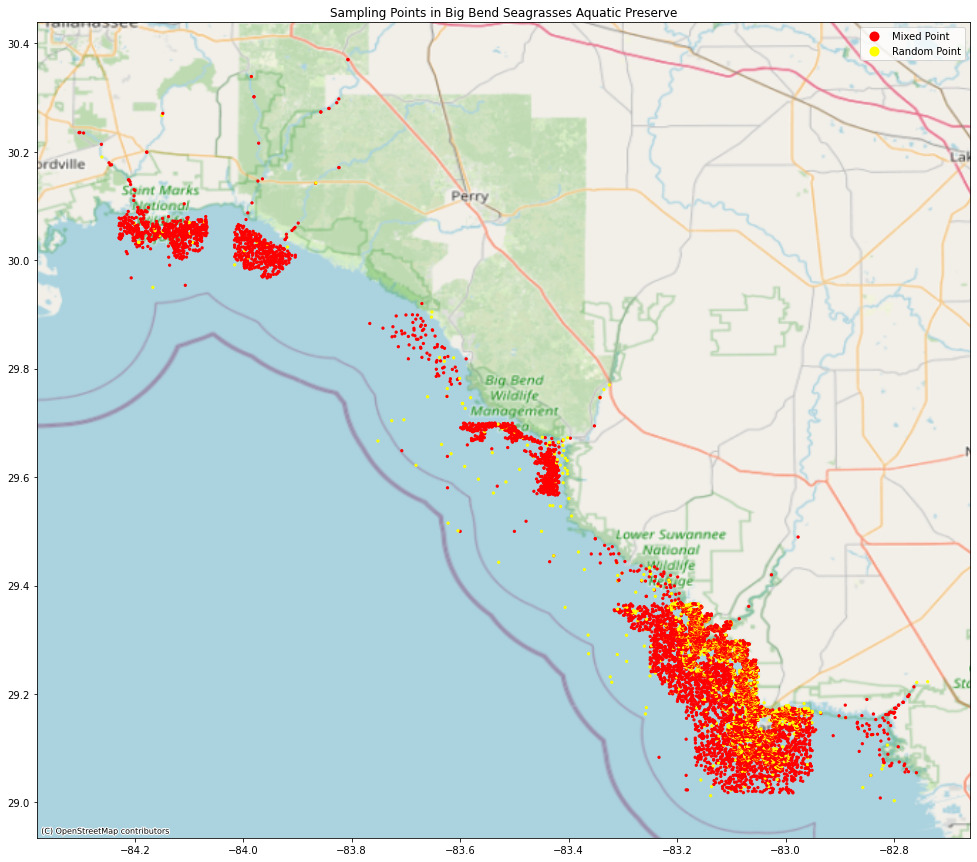

In [118]:
# This step is to depict the figure about mixed points and random points in each area.
plt.rcParams['figure.figsize'] = [20, 15]
for area in listArea:
    areaPoint = gdf_Salinity[gdf_Salinity["ManagedAreaName"] == area]
    ax = areaPoint.plot(column ='ResultValue',k=2,cmap='autumn', markersize=5,categorical=True,legend=True)
    ax.set_title("Sampling Points in "+str(area))
    cx.add_basemap(ax,source = cx.providers.OpenStreetMap.Mapnik,crs=gdf_Salinity.crs)